# LPS response is modulated by changes in burst frequencies

In [19]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

include(ENV["Code"]*"/../Code_Paper/Databases/Cuartero2018.jl")
include(ENV["Code"]*"/../Code_Paper/Databases/mm9.jl")

include(ENV["Code"]*"/../Code_Paper/Figure1e_BSBF_WT_LPS/meanmRNAcounts_BSBF.jl")
include("CalculateBurstSumForFig1.jl")
include("make_all_genes_file.jl")

"all_genes.csv"

## Summarise data for figures

In [31]:
tb = CSV.read("all_genes.csv", DataFrames.DataFrame)

gene = []
RNAseqcomp = []
GROseqcomp = []
smFISHcomp = []
log2FC_RNAseq = []
log2FC_GROseq = []
FC_BS= []
FC_BF = []
N_Cells = []


function addtolists()
    
    push!(gene, gene1)

 gro = GroseqDeseq(GROseqcomp1); 
g = gro[gro[!,:GeneSymbol] .== gene1, "log2FoldChange"]
    if length(g)>0
        push!(log2FC_GROseq, g[1])
    else
        push!(log2FC_GROseq, NaN)
    end
        

push!(GROseqcomp, GROseqcomp1);

rna = Cuartero2018Deseq(RNAseqcomp1); r = rna[rna[!,:GeneSymbol] .== gene1, :log2FoldChange][1]; 
push!(RNAseqcomp, RNAseqcomp1); push!(log2FC_RNAseq, r);


smFISHsamples = split(smFISHcomp1);push!(smFISHcomp, smFISHcomp1)
smfish = tb[[in(ii, smFISHsamples) for ii in tb[!,:Sample]], :]
smfish = smfish[smfish[!,:Gene] .== gene1, :]
n1 = sum(smfish[smfish[!,:Sample] .== smFISHsamples[1], :N_Cells])
n2 = sum(smfish[smfish[!,:Sample] .== smFISHsamples[end], :N_Cells])
push!(N_Cells,n1 + n2)   
bf1 = Statistics.mean(smfish[smfish[!,:Sample] .== smFISHsamples[1], :BF])
bf2 = Statistics.mean(smfish[smfish[!,:Sample] .== smFISHsamples[end], :BF])
oddsratio = bf1/bf2
 push!(FC_BF, oddsratio)

bs1 = smfish[smfish[!,:Sample] .== smFISHsamples[1], :Mean_TSS]
bs2 = smfish[smfish[!,:Sample] .== smFISHsamples[end], :Mean_TSS]
fc = Statistics.mean(bs1[.!isnan.(bs1)]) ./ Statistics.mean(bs2[.!isnan.(bs2)])
push!(FC_BS, fc)
end


gene1 = "Prdm1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_60 vs WT_0"
addtolists()

gene1 = "Egr2"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_60 vs WT_0"
addtolists()



gene1 = "Ifnb1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_90 vs WT_0"
addtolists()

gene1 = "Il12b"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_90 vs WT_0"
addtolists()

gene1 = "Ifit1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_180 vs WT_0"
addtolists()


gene1 = "Cxcl10"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()


gene1 = "Peli1"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()

gene1 = "Sertad2"
RNAseqcomp1 = "WT2_Minus_WTUT"
GROseqcomp1 = "WT1__vs__WT0"
smFISHcomp1 = "WT_120 vs WT_0"
addtolists()


gene1 = "Fh1"
RNAseqcomp1 = "WT8_Minus_WTUT"
GROseqcomp1 = "WT6__vs__WT0"
smFISHcomp1 = "WT_8 vs WT_0"
addtolists()

gene1 = "Hprt"
RNAseqcomp1 = "WT8_Minus_WTUT"
GROseqcomp1 = "WT6__vs__WT0"
smFISHcomp1 = "WT_8 vs WT_0"
addtolists()


tb_sum = DataFrames.DataFrame(
    FC_BS= FC_BS,
    FC_BF= FC_BF,
    log2FC_BS= log2.(FC_BS),
    log2FC_BF= log2.(FC_BF),
GeneSymbol = gene,
RNAseqcomp = RNAseqcomp,
GROseqcomp = GROseqcomp,
smFISHcomp = smFISHcomp,
log2FC_RNAseq = log2FC_RNAseq,
log2FC_GROseq = log2FC_GROseq,
    N_Cells = N_Cells
)
    
CSV.write("Fig1_LPSresponse_smFISH_RNAseq.csv", tb_sum)

"Fig1_LPSresponse_smFISH_RNAseq.csv"

## Code to plot correlations

In [32]:
function dysplay_correlation(tb, x, y; style = "RNAseqcomp", hue = "smFISHcomp")
    bool1 = .! isnan.(tb[!,x]); bool2 = .! isnan.(tb[!,y])
    nonantb = tb[bool1.*bool2, :]
    sort!(nonantb, "smFISHcomp")
    x1 = [ii for ii in nonantb[!,x]]
    y1 = [ii for ii in nonantb[!,y]]
    
    pdt = Pandas.DataFrame(nonantb)

    
    py"""
    import seaborn as sns
    sns.scatterplot(data = $pdt, x= $x, y = $y, hue = $hue, style = $style, palette = "husl", s = 50, linewidth = 0, hue_order = ["WT_60 vs WT_0","WT_90 vs WT_0","WT_120 vs WT_0","WT_180 vs WT_0","WT_8 vs WT_0"])
    
    sns.regplot(data = $pdt, x= $x, y = $y, scatter = 0, color = "darkgray")

    """
    pretty_axes2()
    legend_out_of_plot()
    squareplot()
    R"cor.test($x1,$y1)"
    
end

dysplay_correlation (generic function with 1 method)

## RNAseq vs Burst Frequency

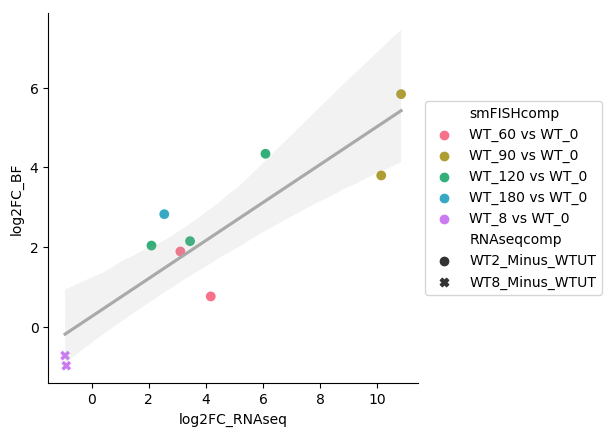

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = 5.41, df = 8, p-value = 0.0006384
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5804282 0.9729448
sample estimates:
      cor 
0.8861928 



In [33]:
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BF", style = "RNAseqcomp")

## RNAseq vs Burst Size


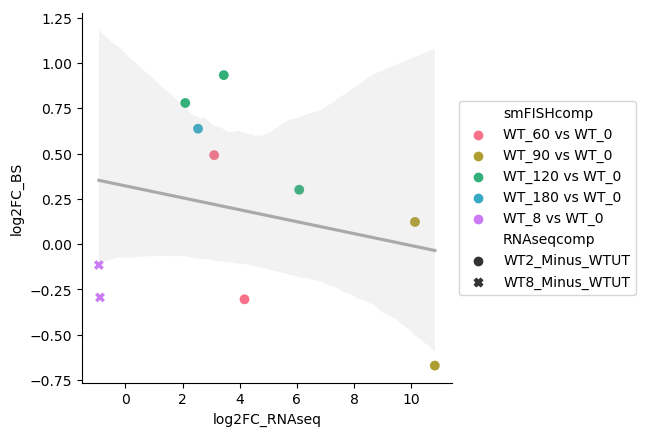

RObject{VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$x1 and `#JL`$y1
t = -0.72614, df = 8, p-value = 0.4885
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7593956  0.4516791
sample estimates:
       cor 
-0.2486647 



In [34]:
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BS", style = "RNAseqcomp")

### Make plot for paper

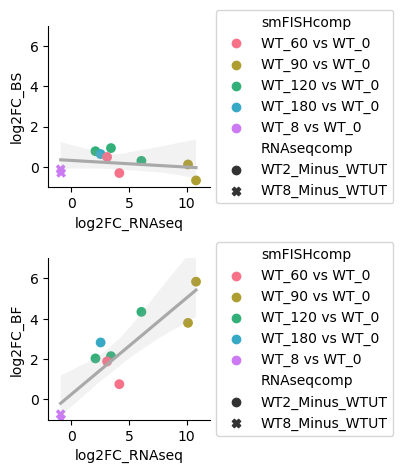

In [38]:
subplot(2,1,1)
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BS")
ylim(-1,7); xlim(-2, 12); squareplot()
subplot(2,1,2)
dysplay_correlation(tb_sum, "log2FC_RNAseq", "log2FC_BF")
ylim(-1,7); xlim(-2, 12); squareplot()
plt.tight_layout()
savefigwithtext("smFISHvsRNAchanges.svg")

In [39]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.9.11
  [a93c6f00] DataFrames v0.22.7
  [31c24e10] Distributions v0.23.12
  [53c48c17] FixedPointNumbers v0.8.4
  [09f84164] HypothesisTests v0.10.2
  [7073ff75] IJulia v1.23.2
  [6a3955dd] ImageFiltering v0.6.21
  [86fae568] ImageView v0.10.13
  [916415d5] Images v0.23.3
  [4138dd39] JLD v0.12.3
  [093fc24a] LightGraphs v1.3.5
  [10e44e05] MATLAB v0.8.0
  [f8716d33] MultipleTesting v0.4.1
  [eadc2687] Pandas v1.4.0
  [91a5bcdd] Plots v1.21.2
  [92933f4c] ProgressMeter v1.5.0
  [438e738f] PyCall v1.92.2
  [d330b81b] PyPlot v2.9.0
  [6f49c342] RCall v0.13.10
  [3646fa90] ScikitLearn v0.6.3
  [d2ef9438] Seaborn v0.4.1
  [2913bbd2] StatsBase v0.33.10
